In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('attempts.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [33]:
import datetime

In [11]:
df.problem=df.problem.replace(86,25)

In [50]:
ass={}
for j in df.student.unique():
    m=df[df.student==j].problem.values
    ass[j]=[(m[i],m[i+1]) for i in range(len(m)-1)]
    

In [88]:
d=[]
for j in ass.values():
    if j!=[]:
        
        d.append(np.array(j))
    
m=np.concatenate(d)

In [107]:
dr=pd.DataFrame(data=m,columns=['zero','one'])
a=dr.sort_values(by=['zero','one'])


,zero,one
1026,2,1
127,2,2
96,2,3
152586,2,4
2484,2,5
...,...,...
5667,2,76
1119,2,79
127076,2,81
4685,2,84


In [5]:

def upda_thet(theta,action,K,out):
    
    
    probs=sigmoid((theta-action))
    
    return theta+K*(out-probs)

In [3]:
estimators = [
    ('onehot', OneHotEncoder()),
    ('lr', LogisticRegression())
]
pipe = Pipeline(estimators)

# Just check the encoded variables
ohe = OneHotEncoder()
print(ohe.fit_transform(df[['student', 'problem']]))


  (0, 1)	1.0
  (0, 20557)	1.0
  (1, 1)	1.0
  (1, 20567)	1.0
  (2, 1)	1.0
  (2, 20565)	1.0
  (3, 1)	1.0
  (3, 20569)	1.0
  (4, 1)	1.0
  (4, 20566)	1.0
  (5, 1)	1.0
  (5, 20556)	1.0
  (6, 1)	1.0
  (6, 20558)	1.0
  (7, 1)	1.0
  (7, 20603)	1.0
  (8, 1)	1.0
  (8, 20572)	1.0
  (9, 1)	1.0
  (9, 20563)	1.0
  (10, 2)	1.0
  (10, 20557)	1.0
  (11, 2)	1.0
  (11, 20585)	1.0
  (12, 2)	1.0
  :	:
  (285798, 20640)	1.0
  (285799, 20554)	1.0
  (285799, 20569)	1.0
  (285800, 20554)	1.0
  (285800, 20580)	1.0
  (285801, 20554)	1.0
  (285801, 20563)	1.0
  (285802, 20554)	1.0
  (285802, 20565)	1.0
  (285803, 20554)	1.0
  (285803, 20567)	1.0
  (285804, 20554)	1.0
  (285804, 20574)	1.0
  (285805, 20554)	1.0
  (285805, 20575)	1.0
  (285806, 20495)	1.0
  (285806, 20604)	1.0
  (285807, 20555)	1.0
  (285807, 20605)	1.0
  (285808, 20555)	1.0
  (285808, 20598)	1.0
  (285809, 20555)	1.0
  (285809, 20569)	1.0
  (285810, 20555)	1.0
  (285810, 20620)	1.0


In [4]:
pipe.fit(df[['student', 'problem']], df['solved'])
print(pipe.predict_proba(df[['student', 'problem']]))

[[0.01447939 0.98552061]
 [0.0060792  0.9939208 ]
 [0.00706871 0.99293129]
 ...
 [0.03005869 0.96994131]
 [0.04542564 0.95457436]
 [0.12874894 0.87125106]]


/opt/homebrew/anaconda3/envs/newenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
cofs=pipe[1].coef_

In [15]:
cofs.shape

(1, 20641)

In [6]:
theta=pd.Series(index=np.sort(df.student.unique()),data=cofs.reshape(-1,)[:-85])

In [7]:
diffik=pd.Series(index=np.sort(df.problem.unique()),data=cofs.reshape(-1,)[-85:])

In [19]:

scv=diffik.sort_values().index.values
po=[]
for j in df.problem.values:
    po.append((np.where(scv==j)[0]+1)[0])
df.problem=po    

In [9]:
diffik=pd.Series(diffik.sort_values().values)

In [13]:
df[df.student==27966]


,id,student,problem,start,solved,time,n_edits,n_executions,program,problemset
239561,257945,27966,51,2020-03-26 14:17:36.166236+00:00,True,13,3,1,fff,1
239564,257948,27966,49,2020-03-26 14:17:58.183377+00:00,True,13,3,1,rff,2
239565,257949,27966,67,2020-03-26 14:18:15.763384+00:00,True,18,4,1,llrr,3
239567,257951,27966,14,2020-03-26 14:18:38.238033+00:00,True,26,6,1,frl,3
239571,257955,27966,8,2020-03-26 14:19:09.101738+00:00,True,28,6,1,frssf,4
...,...,...,...,...,...,...,...,...,...,...
240160,258574,27966,31,2020-03-26 21:54:30.234522+00:00,True,8,4,1,rrff,3
240161,258575,27966,2,2020-03-26 21:54:49.742950+00:00,True,7,3,1,lrf,2
240162,258576,27966,26,2020-03-26 21:55:08.267910+00:00,True,6,3,1,frl,2
240163,258577,27966,44,2020-03-26 21:55:22.436767+00:00,True,6,3,1,lff,2


In [14]:
diffik
fiffik=diffik-diffik.min()

In [17]:
fake_dic_panda_real_k={k:{} for k in np.arange(0.1,1.5,0.3)}
for k in np.arange(0.1,1.5,0.3):
    
    for j in df.student.unique():
        m=df[df.student==j]
        fake_dic_panda_real_k[k]['student_'+str(j)]=pd.DataFrame(index=np.arange(len(m)))
        fake_dic_panda_real_k[k]['student_'+str(j)]['theta_'+str(j)]=0
        fake_dic_panda_real_k[k]['student_'+str(j)]['action_'+str(j)]=m.problem.values
        l=[0]
        r=[]
        for i in range(len(m)):
            l.append(wa[np.around(upda_thet(l[-1],diffik.iloc[m.problem.iloc[i]-1],k,m.correct.iloc[i]),decimals=1)])
            r.append(((l[-1]-l[-2])>0)*fiffik.iloc[m.problem.iloc[i]-1])
        fake_dic_panda_real_k[k]['student_'+str(j)]['theta_'+str(j)]=l[:-1]
        fake_dic_panda_real_k[k]['student_'+str(j)]['reward_'+str(j)]=r
        fake_dic_panda_real_k[k]['student_'+str(j)]['new_theta_'+str(j)]=l[1:]

In [27]:
bdf_feedback_train_k={k:{} for k in np.arange(0.1,1.5,0.3)}
bdf_feedback_test_k={k:{} for k in np.arange(0.1,1.5,0.3)}
empire_proba_k={k:{} for k in np.arange(0.1,1.5,0.3)}
for k in np.arange(0.1,1.5,0.3):
    data_buf=np.concatenate([fake_dic_panda_real_k[k]['student_'+str(j)].values for j in df.student.unique()],axis=0)
    dbf_real=pd.DataFrame(columns=['theta','action','reward','new_theta'],data=data_buf)
    bandit_dbf_real=dbf_real.drop('new_theta',1)
    empire_proba_real=pd.DataFrame(index=dbf_real.theta.sort_values().unique(),columns=np.arange(1,86))
    
    for j in dbf_real.theta.sort_values().unique():
        
        empire_proba_real.loc[j]=(np.bincount(dbf_real[dbf_real.theta==j].action,minlength=86)/len(dbf_real[dbf_real.theta==j].action))[1:]    
    empire_proba_k[k]= empire_proba_real
    bandit_dbf_real_train,bandit_dbf_real_test=train_test_split(bandit_dbf_real,test_size=0.33)
    
    a=bandit_dbf_real_train.shape[0]

    
    bdf_feedback_train_k[k]['n_rounds']=a
    bdf_feedback_train_k[k]['n_actions']=85
    bdf_feedback_train_k[k]['context']=bandit_dbf_real_train.theta.values.reshape(a,1)
    bdf_feedback_train_k[k]['action_context']=np.eye(85)
    bdf_feedback_train_k[k]['action']=bandit_dbf_real_train.action.values.astype(int)-1
    bdf_feedback_train_k[k]['position']=None
    bdf_feedback_train_k[k]['reward']=bandit_dbf_real_train.reward.values
    bdf_feedback_train_k[k]['expected_reward']=expected_reward_real.loc[bandit_dbf_real_train.theta.values].values
    bdf_feedback_train_k[k]['pi_b']=empire_proba_real.loc[bandit_dbf_real_train.theta].values.reshape(a,85,1)
    bdf_feedback_train_k[k]['pscore']=bdf_feedback_train_k[k]['pi_b'][range(a),bandit_dbf_real_train.action.values.astype(int)-1].reshape(a,)

    a=bandit_dbf_real_test.shape[0]
    
    bdf_feedback_test_k[k]['n_rounds']=a
    bdf_feedback_test_k[k]['n_actions']=85
    bdf_feedback_test_k[k]['context']=bandit_dbf_real_test.theta.values.reshape(a,1)
    bdf_feedback_test_k[k]['action_context']=np.eye(85)
    bdf_feedback_test_k[k]['action']=bandit_dbf_real_test.action.values.astype(int)-1
    bdf_feedback_test_k[k]['position']=None
    bdf_feedback_test_k[k]['reward']=bandit_dbf_real_test.reward.values
    bdf_feedback_test_k[k]['expected_reward']=expected_reward_real.loc[bandit_dbf_real_test.theta.values].values
    bdf_feedback_test_k[k]['pi_b']=empire_proba_real.loc[bandit_dbf_real_test.theta].values.reshape(a,85,1)
    bdf_feedback_test_k[k]['pscore']=bdf_feedback_test_k[k]['pi_b'][range(a),bandit_dbf_real_test.action.values.astype(int)-1].reshape(a,)




/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_41469/3305975092.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bandit_dbf_real=dbf_real.drop('new_theta',1)
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_41469/3305975092.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bandit_dbf_real=dbf_real.drop('new_theta',1)
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_41469/3305975092.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bandit_dbf_real=dbf_real.drop('new_theta',1)
/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_41469/3305975092.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  b

<Axes: >

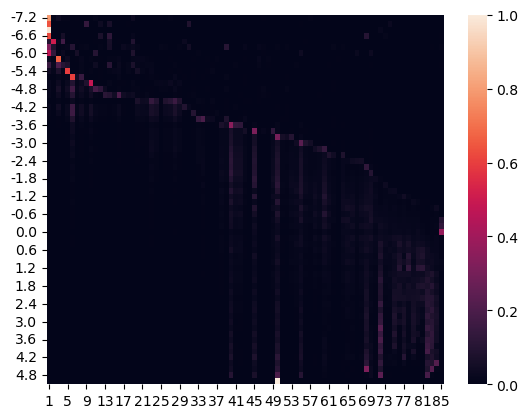

In [28]:
import pickle 

with open('saved_bdf_dic_train.pkl', 'wb') as f:
    pickle.dump(bdf_feedback_train_k, f)
with open('saved_bdf_dic_test.pkl', 'wb') as f:
    pickle.dump(bdf_feedback_test_k, f)
    

In [29]:
with open('empire_proba_k2.pkl', 'wb') as f:
    pickle.dump(empire_proba_k, f)
    

In [26]:
len(bdf_feedback_train_k)

5

In [37]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def update_theta(theta,action,K):
    probs=sigmoid((theta-action))
    haz=np.random.binomial(1,p=probs)
    return theta+K*(haz-probs)
wa={}
for i in np.arange(-10.8,10.1,.2):
    wa[np.around(i,decimals=1)]=np.around(i,decimals=1)
for j in np.arange(-10.9,10,0.2):
    wa[np.around(j,decimals=1)]=np.around(j-0.1,decimals=1)


In [94]:
dic_panda={}
for j in df.student.unique():
    m=df[df.student==j]
    dic_panda['student_'+str(j)]=pd.DataFrame(index=np.arange(len(m)))
    dic_panda['student_'+str(j)]['theta_'+str(j)]=0
    dic_panda['student_'+str(j)]['action_'+str(j)]=m.problem.values
    l=[0]
    r=[]
    for i in dic_panda['student_'+str(j)]['action_'+str(j)]:
        l.append(update_theta(l[-1],diffik.iloc[i-1],1))
        r.append(((l[-1]-l[-2])>0)*fiffik.iloc[i-1])
    dic_panda['student_'+str(j)]['theta_'+str(j)]=l[:-1]
    dic_panda['student_'+str(j)]['reward_'+str(j)]=r
    dic_panda['student_'+str(j)]['new_theta_'+str(j)]=l[1:]

In [97]:

def upda_thet(theta,action,K,out):
    probs=sigmoid(K*(theta-action))
    
    return theta+K*(out-probs)

In [98]:
fake_dic_panda_real={}
for j in df.student.unique():
    m=df[df.student==j]
    fake_dic_panda_real['student_'+str(j)]=pd.DataFrame(index=np.arange(len(m)))
    fake_dic_panda_real['student_'+str(j)]['theta_'+str(j)]=0
    fake_dic_panda_real['student_'+str(j)]['action_'+str(j)]=m.problem.values
    l=[0]
    r=[]
    for i in range(len(m)):
        l.append(wa[np.around(upda_thet(l[-1],diffik.iloc[m.problem.iloc[i]-1],0.4,m.solved.iloc[i]),decimals=1)])
        r.append(((l[-1]-l[-2])>0)*fiffik.iloc[m.problem.iloc[i]-1])
    fake_dic_panda_real['student_'+str(j)]['theta_'+str(j)]=l[:-1]
    fake_dic_panda_real['student_'+str(j)]['reward_'+str(j)]=r
    fake_dic_panda_real['student_'+str(j)]['new_theta_'+str(j)]=l[1:]

In [100]:
fake_dic_panda_real['student_29']

,theta_29,action_29,reward_29,new_theta_29
0,0.0,81,6.912439,0.2
1,0.2,85,7.788781,0.4
2,0.4,84,7.636978,0.6
3,0.6,78,6.705875,0.8
4,0.8,71,5.637254,1.0
5,1.0,63,4.909672,1.2
6,1.2,61,4.718974,1.4
7,1.4,75,6.541184,1.6
8,1.6,53,4.308496,1.8
9,1.8,82,7.074870,2.0


In [102]:
data_buf=np.concatenate([fake_dic_panda_real['student_'+str(j)].values for j in df.student.unique()],axis=0)

In [103]:
dbf_real=pd.DataFrame(columns=['theta','action','reward','new_theta'],data=data_buf)

In [115]:
np.sort(dbf_real.theta.unique())

array([-7. , -6.8, -6.6, -6.4, -6.2, -6. , -5.8, -5.6, -5.4, -5.2, -5. ,
       -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8,
       -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6,
       -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,
        1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,
        4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4])

In [104]:
bandit_dbf_real=dbf_real.drop('new_theta',1)
import seaborn as sns

/var/folders/rh/v2m3z36j1j71mqlvn91zps5c0000gn/T/ipykernel_92251/4034191785.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bandit_dbf_real=dbf_real.drop('new_theta',1)


In [189]:
empire_proba_real=pd.DataFrame(index=dbf_real.theta.sort_values().unique(),columns=np.arange(1,86))

In [190]:
for j in dbf_real.theta.sort_values().unique():
    empire_proba_real.loc[j]=(np.bincount(dbf_real[dbf_real.theta==j].action,minlength=86)/len(dbf_real[dbf_real.theta==j].action))[1:]    

In [187]:
for j in dbf_real.theta.sort_values().unique():
    

    print(j,(np.bincount(dbf_real[dbf_real.theta==j].action,minlength=84)/len(dbf_real[dbf_real.theta==j].action))[1:].shape)

-7.0 (83,)
-6.8 (83,)
-6.6 (83,)
-6.4 (83,)
-6.2 (83,)
-6.0 (83,)
-5.8 (83,)
-5.6 (83,)
-5.4 (83,)
-5.2 (83,)
-5.0 (83,)
-4.8 (84,)
-4.6 (83,)
-4.4 (83,)
-4.2 (83,)
-4.0 (83,)
-3.8 (83,)
-3.6 (83,)
-3.4 (83,)
-3.2 (84,)
-3.0 (83,)
-2.8 (83,)
-2.6 (83,)
-2.4 (85,)
-2.2 (83,)
-2.0 (83,)
-1.8 (83,)
-1.6 (84,)
-1.4 (85,)
-1.2 (85,)
-1.0 (85,)
-0.8 (85,)
-0.6 (85,)
-0.4 (85,)
-0.2 (85,)
0.0 (85,)
0.2 (85,)
0.4 (85,)
0.6 (85,)
0.8 (85,)
1.0 (85,)
1.2 (85,)
1.4 (85,)
1.6 (85,)
1.8 (85,)
2.0 (85,)
2.2 (85,)
2.4 (85,)
2.6 (85,)
2.8 (85,)
3.0 (85,)
3.2 (85,)
3.4 (85,)
3.6 (85,)
3.8 (85,)
4.0 (85,)
4.2 (85,)
4.4 (85,)
4.6 (85,)
4.8 (85,)
5.0 (85,)
5.2 (85,)
5.4 (83,)


In [184]:
j=-1.0

In [185]:
np.bincount(dbf_real[dbf_real.theta==j].action,minlength=86)

array([ 0,  3,  5,  5,  6, 10, 10,  6,  6,  6,  7,  6,  3,  4,  2, 10,  7,
        0,  7,  1,  5,  4,  8,  3,  6,  7,  6,  6,  3,  4,  1,  7,  2,  3,
        6,  3,  2,  3,  7,  4,  2,  3,  1,  1,  2,  2,  1,  2,  2,  1,  1,
        0,  3,  0,  2,  2,  2,  0,  2,  0,  2,  3,  1,  0,  4,  0,  0,  1,
        1,  1,  0,  2,  5,  0,  0,  3,  3,  3,  1,  3,  3,  1,  0,  3,  3,
        1])

In [23]:
expected_reward_real=pd.DataFrame(index=np.around(np.arange(-10,10,0.2),decimals=1),columns=np.arange(1,86))
for j in expected_reward_real.index:
    for a in range(1,86):
        
    
        expected_reward_real.loc[j,a]=sigmoid(j-diffik.iloc[a-1])*fiffik.iloc[a-1]

In [25]:
 expected_reward_real

,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,81,82,83,84,85
-10.0,0.0,0.000711,0.000696,0.000654,0.000615,0.000551,0.000547,0.000546,0.000497,0.000481,...,0.000031,0.000031,0.000031,0.000026,0.000026,0.000025,0.000024,0.000022,0.000021,0.000016
-9.8,0.0,0.000868,0.000849,0.000799,0.000751,0.000673,0.000668,0.000667,0.000607,0.000588,...,0.000038,0.000038,0.000037,0.000032,0.000032,0.000031,0.000029,0.000027,0.000026,0.00002
-9.6,0.0,0.00106,0.001037,0.000976,0.000918,0.000822,0.000816,0.000814,0.000742,0.000718,...,0.000047,0.000046,0.000046,0.000039,0.000039,0.000038,0.000035,0.000033,0.000031,0.000024
-9.4,0.0,0.001294,0.001267,0.001192,0.001121,0.001004,0.000996,0.000995,0.000906,0.000877,...,0.000057,0.000057,0.000056,0.000047,0.000047,0.000046,0.000043,0.00004,0.000038,0.000029
-9.2,0.0,0.00158,0.001547,0.001456,0.001369,0.001226,0.001217,0.001215,0.001106,0.001071,...,0.000069,0.000069,0.000068,0.000058,0.000057,0.000056,0.000052,0.000049,0.000047,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.0,0.0,0.721809,1.423055,1.60303,1.755921,1.993373,2.007741,2.011295,2.190029,2.249214,...,5.953065,5.955518,5.979172,6.16937,6.177755,6.198936,6.285113,6.372737,6.421284,6.737142
9.2,0.0,0.721809,1.423058,1.603034,1.755926,1.993381,2.007748,2.011303,2.190039,2.249225,...,5.954218,5.956674,5.980361,6.170856,6.179256,6.200474,6.286815,6.374622,6.423278,6.740025
9.4,0.0,0.72181,1.423061,1.603037,1.75593,1.993387,2.007754,2.011309,2.190047,2.249234,...,5.955163,5.957622,5.981335,6.172074,6.180485,6.201734,6.288209,6.376166,6.424913,6.742388
9.6,0.0,0.72181,1.423063,1.60304,1.755933,1.993392,2.007759,2.011314,2.190054,2.249241,...,5.955936,5.958397,5.982133,6.17307,6.181492,6.202766,6.28935,6.377431,6.426251,6.744323


Text(50.722222222222214, 0.5, 'theta')

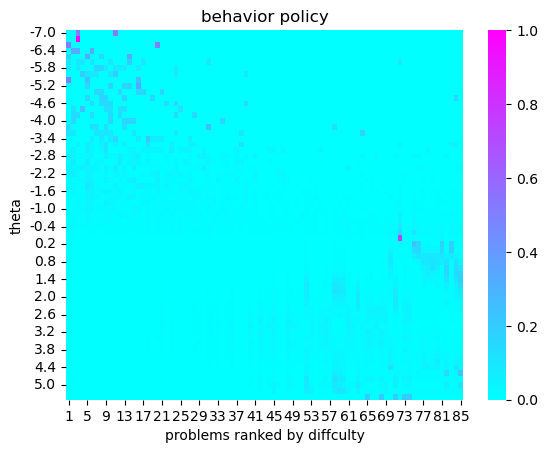

In [213]:
sns.heatmap(empire_proba_real.astype(float),cmap='cool')
plt.title('behavior policy')
plt.xlabel('problems ranked by diffculty')
plt.ylabel('theta')

In [26]:
from sklearn.model_selection import train_test_split

In [201]:
bandit_dbf_real_train,bandit_dbf_real_test=train_test_split(bandit_dbf_real,test_size=0.33)

In [202]:
bandit_dbf_real_train.shape[0]

(191493, 3)

In [204]:
a=bandit_dbf_real_train.shape[0]

bdf_feedback_train={}
bdf_feedback_train['n_rounds']=a
bdf_feedback_train['n_actions']=85
bdf_feedback_train['context']=bandit_dbf_real_train.theta.values.reshape(a,1)
bdf_feedback_train['action_context']=np.eye(85)
bdf_feedback_train['action']=bandit_dbf_real_train.action.values.astype(int)-1
bdf_feedback_train['position']=None
bdf_feedback_train['reward']=bandit_dbf_real_train.reward.values
bdf_feedback_train['expected_reward']=expected_reward_real.loc[bandit_dbf_real_train.theta.values].values
bdf_feedback_train['pi_b']=empire_proba_real.loc[bandit_dbf_real_train.theta].values.reshape(a,85,1)
bdf_feedback_train['pscore']=bdf_feedback_train['pi_b'][range(a),bandit_dbf_real_train.action.values.astype(int)-1].reshape(a,)



In [205]:
a=bandit_dbf_real_test.shape[0]
bdf_feedback_test={}
bdf_feedback_test['n_rounds']=a
bdf_feedback_test['n_actions']=85
bdf_feedback_test['context']=bandit_dbf_real_test.theta.values.reshape(a,1)
bdf_feedback_test['action_context']=np.eye(85)
bdf_feedback_test['action']=bandit_dbf_real_test.action.values.astype(int)-1
bdf_feedback_test['position']=None
bdf_feedback_test['reward']=bandit_dbf_real_test.reward.values
bdf_feedback_test['expected_reward']=expected_reward_real.loc[bandit_dbf_real_test.theta.values].values
bdf_feedback_test['pi_b']=empire_proba_real.loc[bandit_dbf_real_test.theta].values.reshape(a,85,1)
bdf_feedback_test['pscore']=bdf_feedback_test['pi_b'][range(a),bandit_dbf_real_test.action.values.astype(int)-1].reshape(a,)


In [207]:
import pickle 

with open('saved_bdf_train.pkl', 'wb') as f:
    pickle.dump(bdf_feedback_train, f)
with open('saved_bdf_test.pkl', 'wb') as f:
    pickle.dump(bdf_feedback_test, f)
    

In [214]:
df

,id,student,problem,start,solved,time,n_edits,n_executions,program,problemset
0,4,29,81,2017-11-10 12:20:05.152265+00:00,True,24,3,2,lrf,2
1,5,29,85,2017-11-10 12:20:32.155447+00:00,True,19,4,1,rrff,5
2,6,29,84,2017-11-10 12:20:54.080259+00:00,True,10,3,1,sff,4
3,7,29,78,2017-11-10 12:21:06.966330+00:00,True,18,3,1,frl,3
4,8,29,71,2017-11-10 12:21:33.061485+00:00,True,27,4,1,R4{fs},7
...,...,...,...,...,...,...,...,...,...,...
285806,308258,32173,44,2020-10-01 17:22:44.928241+00:00,False,5689,9,2,R4{l}R2{r},13
285807,308259,32252,72,2020-10-01 17:24:41.451870+00:00,True,42,5,3,fff,1
285808,308260,32252,83,2020-10-01 17:25:27.317684+00:00,True,16,3,2,lff,2
285809,308261,32252,78,2020-10-01 17:25:47.455266+00:00,True,74,18,4,frl,3


Text(0.5, 1.0, 'histogram of the difficulties')

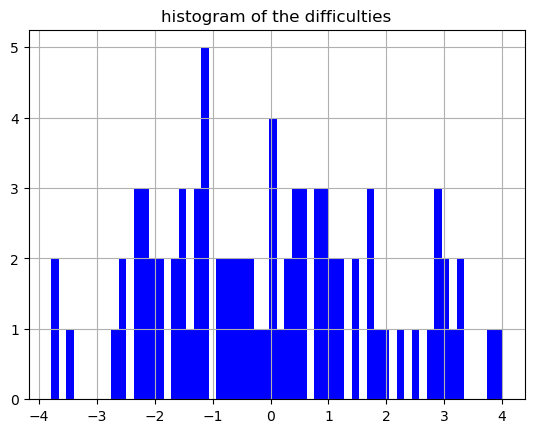

In [229]:
diffik.hist(bins=60,color='b')
plt.title('histogram of the difficulties')


In [221]:
len(df.student.unique())

20556

In [1]:
import numpy as np
import torch
import tqdm
from torch import nn
from torch.autograd import Variable
from sklearn.metrics import roc_auc_score

In [7]:
import pickle
with open('weight.pkl', 'rb') as f:
    x = pickle.load(f)

In [14]:
class Net(nn.Module):
    def __init__(self, num_questions, hidden_size, num_layers):
        super(Net, self).__init__()
        self.hidden_dim = hidden_size
        self.layer_dim = num_layers
        self.rnn = nn.RNN(num_questions * 2, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_dim, num_questions)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, self.hidden_dim))
        out, _ = self.rnn(x, h0)
        res = torch.sigmoid(self.fc(out))
        return res,out


In [15]:
nee=Net(num_questions=85,hidden_size=5,num_layers=3)

In [16]:
nee.load_state_dict(x)

<All keys matched successfully>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
df=pd.read_csv('attempts.csv')
list_student={}
for j in df.student.unique():
    list_student[j]=df[df.student==j][['problem','solved']]
ohe=OneHotEncoder()
q=ohe.fit_transform(df[['problem','solved']])
encoded_list={}
for j in df.student.unique():
    encoded_list[j]=q[list_student[j].index]
good_list={}
for j in df.student.unique():
    m=encoded_list[j].toarray()
    good_list[j]=np.zeros((m.shape[0],2*85))
    for i in range(m.shape[0]):
        
        if m[i,-2]:

            good_list[j][i][:85]=m[i][:-2]
            
        else:
            good_list[j][i,-85:]=m[i][:-2]
    

In [25]:
q=nee.forward(torch.Tensor(good_list[29]))

In [32]:
context_dic={}
for j in df.student.unique():
    context_dic[j]=nee.forward(torch.Tensor(good_list[j]))[1]


In [33]:
context_dic

{29: tensor([[-0.6193, -0.4553, -0.3093,  0.2052,  0.1445],
         [-0.6829, -0.1803, -0.5380,  0.3219,  0.5391],
         [-0.6423, -0.1887, -0.4571,  0.1814,  0.2506],
         [-0.5686, -0.0887, -0.5042,  0.2187,  0.2401],
         [-0.7301, -0.1818, -0.4278,  0.2806,  0.4827],
         [-0.5745, -0.1102, -0.5104,  0.2098,  0.2387],
         [-0.7174, -0.1818, -0.5031,  0.2635,  0.4061],
         [-0.6023, -0.1721, -0.4283,  0.1376,  0.2268],
         [-0.6030, -0.1139, -0.4306,  0.2674,  0.3333],
         [-0.7041, -0.1356, -0.4472,  0.3026,  0.5434]],
        grad_fn=<SqueezeBackward1>),
 584: tensor([[-0.6193, -0.4553, -0.3093,  0.2052,  0.1445],
         [-0.6515, -0.2613, -0.5072,  0.2442,  0.2939],
         [-0.7018, -0.0999, -0.5176,  0.3356,  0.5252],
         [-0.6166, -0.0655, -0.4640,  0.2026,  0.4383],
         [-0.6639, -0.0651, -0.5679,  0.3471,  0.4299],
         [-0.6159, -0.1118, -0.3967,  0.1320,  0.3346],
         [-0.5792, -0.0386, -0.5126,  0.3684,  0.2718],
 

,id,student,problem,start,solved,time,n_edits,n_executions,program,problemset
613,795,5835,26,2017-11-29 20:16:00.270758+00:00,False,26,2,1,ff,2
